# 1. Libraries <a class='anchor' id='lib'></a> [↑](#top)

In [84]:
import os
import PIL
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize as resz
from PIL import Image, ImageOps

# neural imaging
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt

unique:  [0. 1. 2. 3.]
max:  3.0


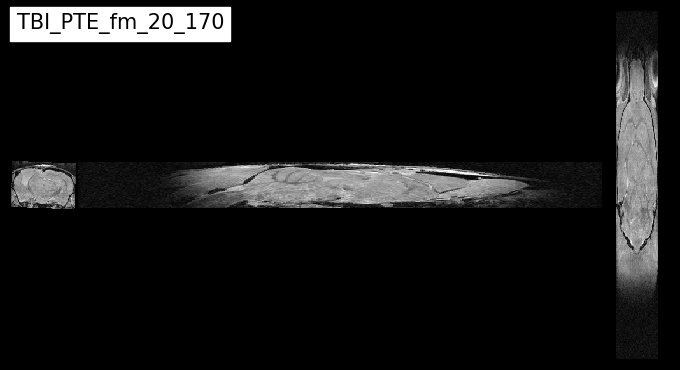

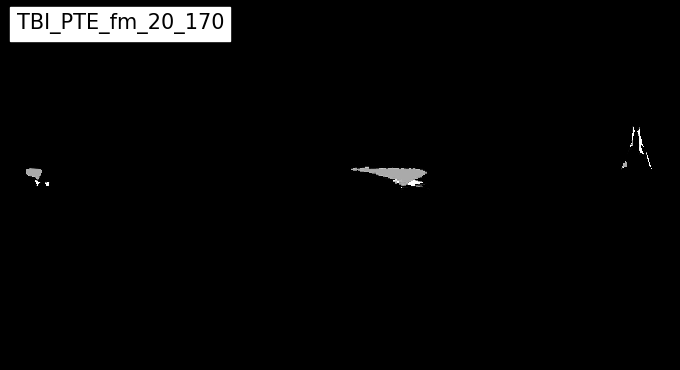

In [85]:
from utils.nifti import load_nifti
path = '../data_fix/downsampled/'
case = 'TBI_PTE_fm_20_170'

# load nifti
nii_img, nii_data = load_nifti(os.path.join(path, case, 'Anat', case + '_N4.nii.gz'))

# plot nifti
nlplt.plot_anat(nii_img, title=case, display_mode='ortho', dim=-1, draw_cross=False, annotate=False, black_bg=True)

# load mask
mask_img, mask_data = load_nifti(os.path.join(path, case, 'Anat', case + '_lesion_mask.nii.gz'))

# plot nifti
nlplt.plot_anat(mask_img, title=case, display_mode='ortho', dim=-1, draw_cross=False, annotate=False, black_bg=True)

# print unique values in mask
print('unique: ', np.unique(mask_data))
print('max: ', np.max(mask_data))

unique:  [0. 1. 2. 3.]
max:  3.0


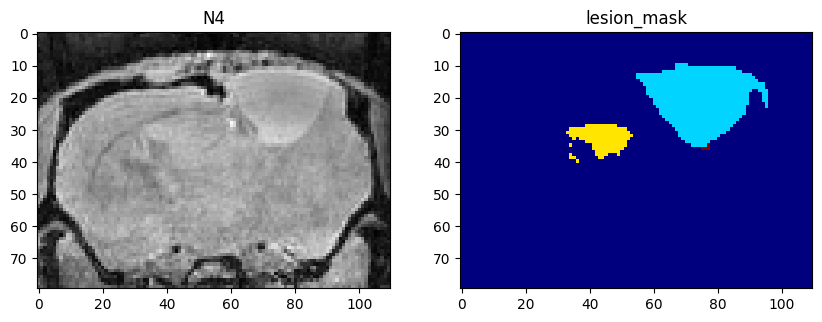

unique:  [0. 1. 2. 3.]
max:  3.0


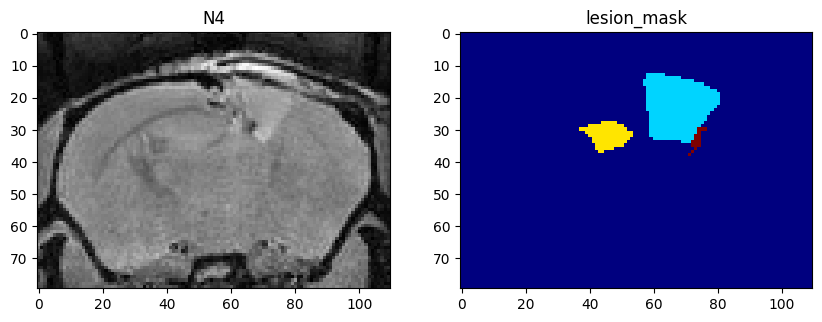

unique:  [0. 1. 2. 3.]
max:  3.0


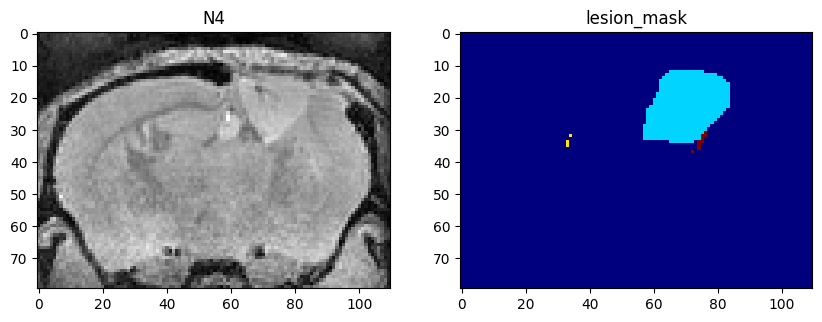

unique:  [0. 1. 2. 3.]
max:  3.0


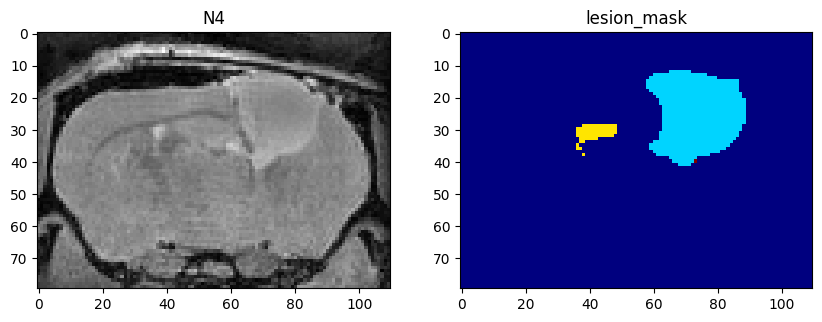

unique:  [0. 1. 2. 3.]
max:  3.0


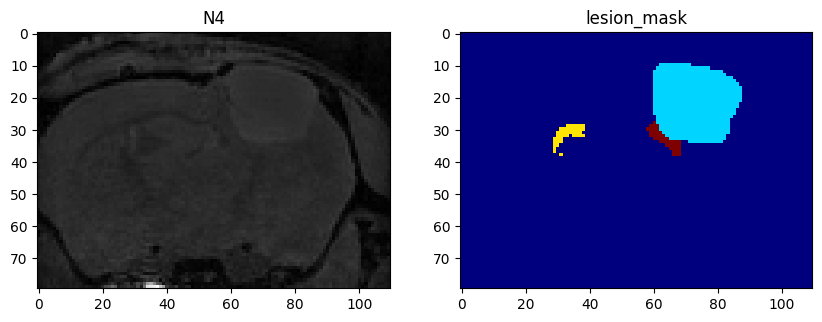

unique:  [0. 1. 2. 3.]
max:  3.0


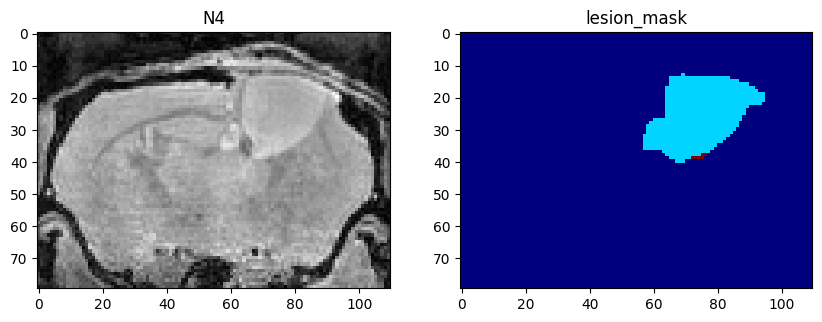

unique:  [0. 1. 2. 3.]
max:  3.0


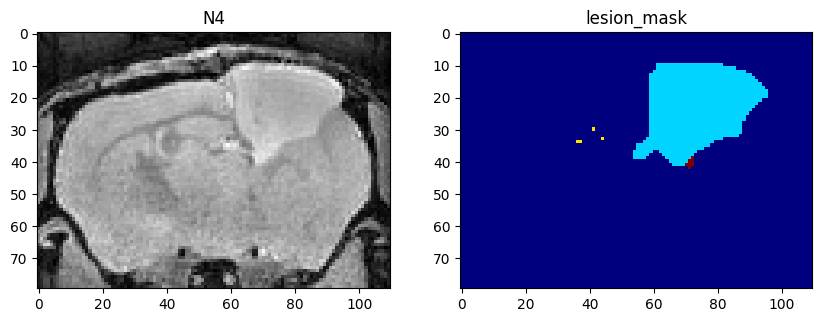

unique:  [0. 1. 2. 3.]
max:  3.0


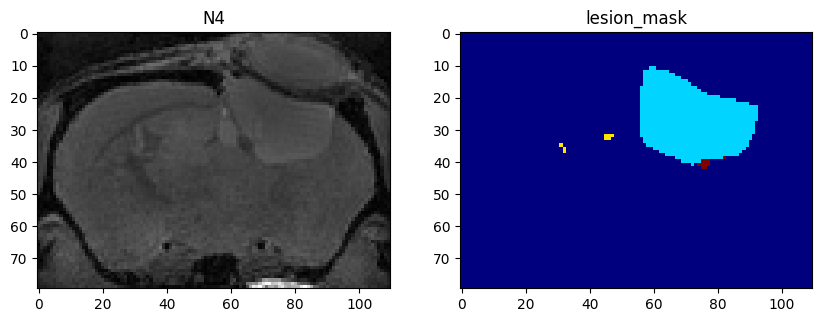

unique:  [0. 1. 2. 3.]
max:  3.0


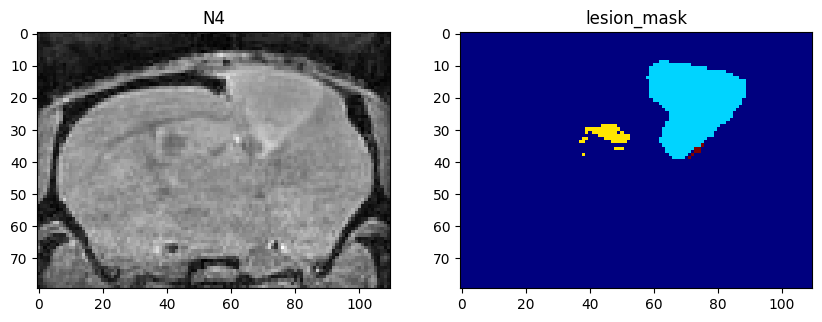

unique:  [0. 1. 2. 3.]
max:  3.0


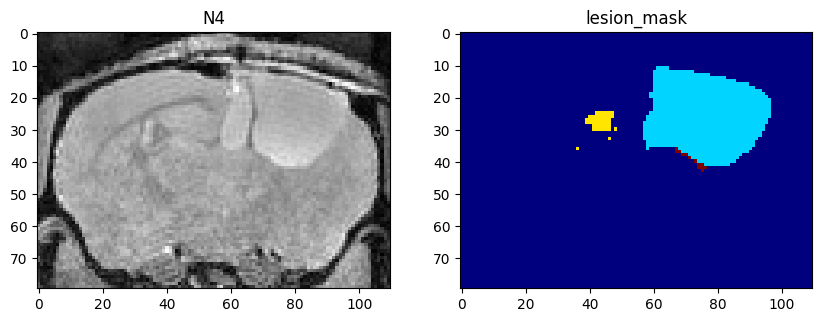

unique:  [0. 1. 2. 3.]
max:  3.0


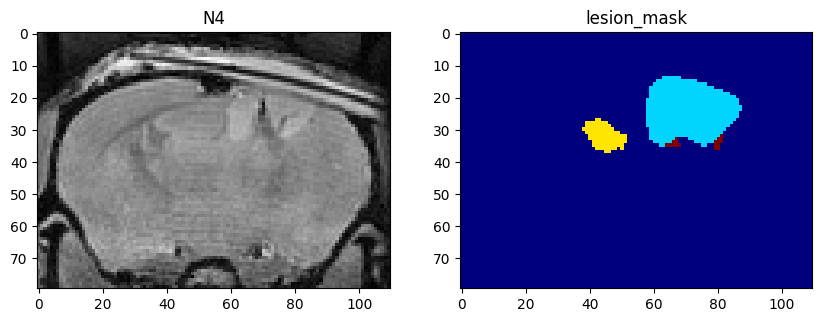

unique:  [0. 1. 2. 3.]
max:  3.0


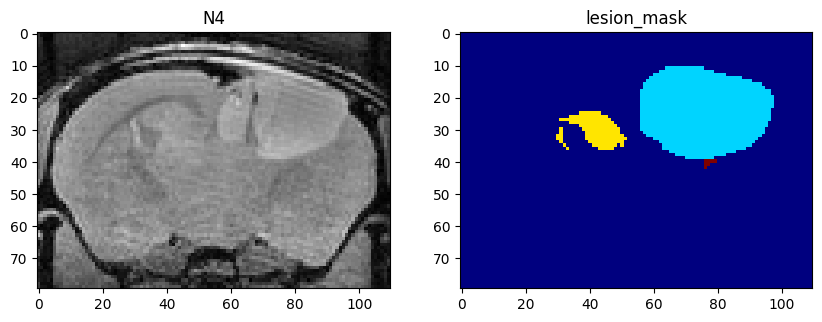

unique:  [0. 1. 2. 3.]
max:  3.0


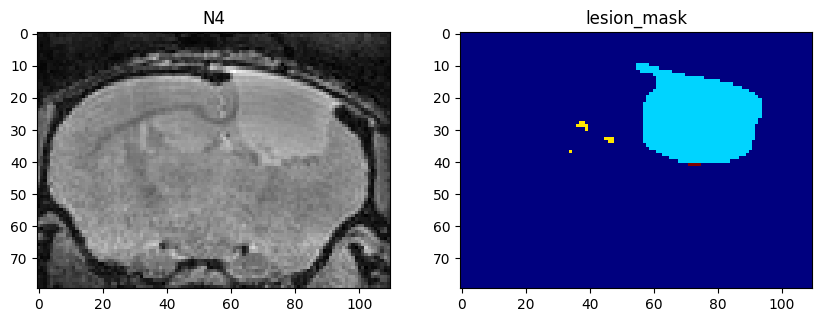

unique:  [0. 1. 2. 3.]
max:  3.0


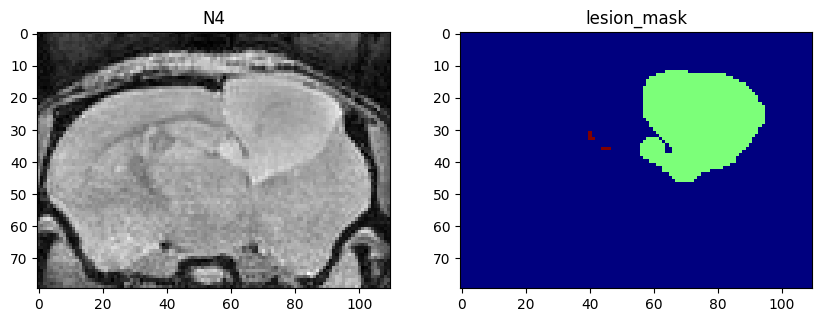

unique:  [0. 1. 2. 3.]
max:  3.0


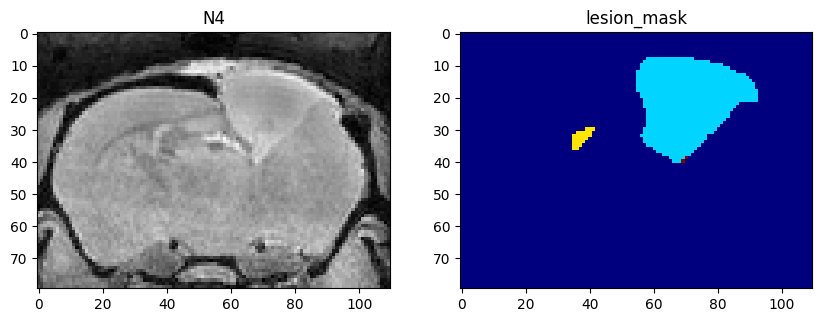

In [86]:
from utils.visualization import plot_data, plot_data_axis
from utils.loader import load_data

# Modalities
modalities = ['N4', 'lesion_mask']
layer=180
path = '../data_fix/downsampled/'
for dir in os.listdir(path):
    case = dir
    # Plot data
    images, data, file_paths = load_data(dir, path, modalities)
    print('unique: ', np.unique(data['lesion_mask']))
    # plot only label equal to 1
    # data['lesion_mask'][data['lesion_mask'] != 2] = 0
    # print max
    print('max: ', np.max(data['lesion_mask']))


    plot_data_axis(data, layer, axis=2, rotation=-1) 

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


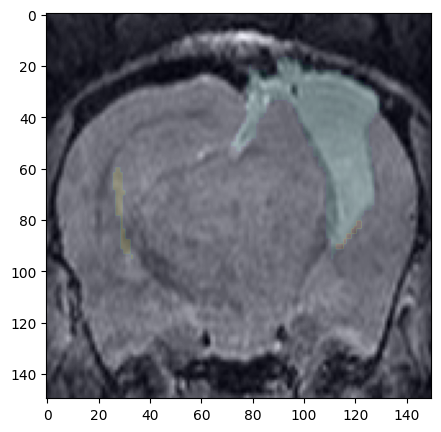

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


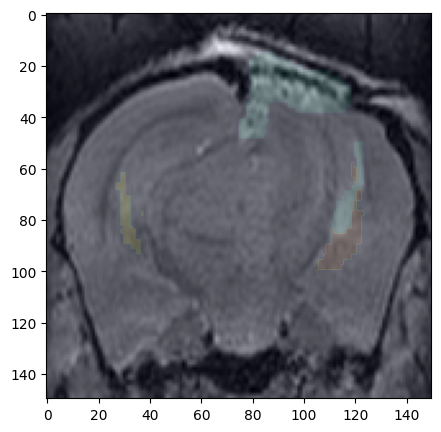

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


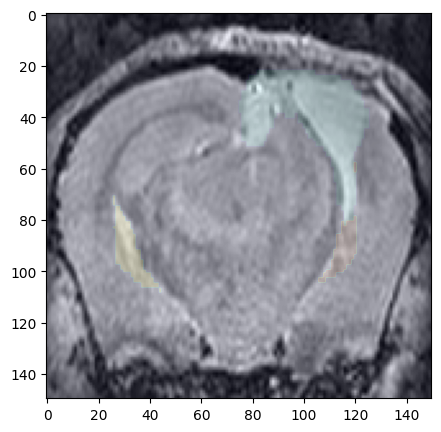

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


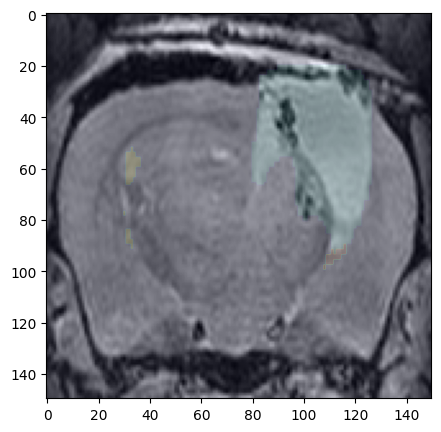

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


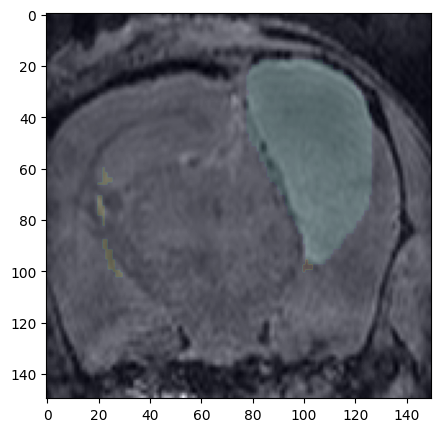

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


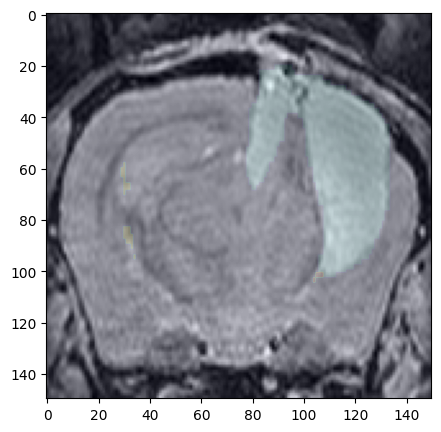

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


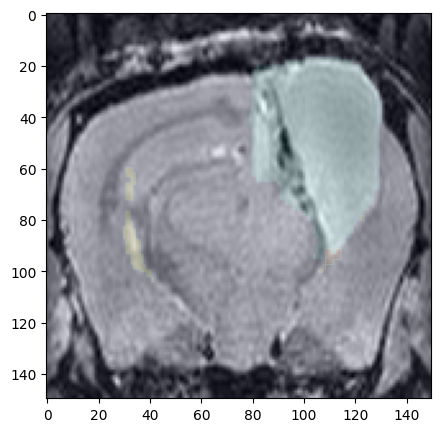

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


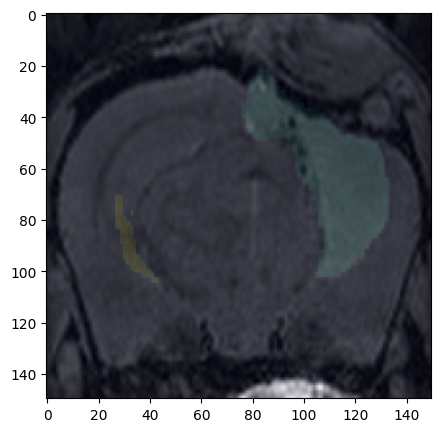

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


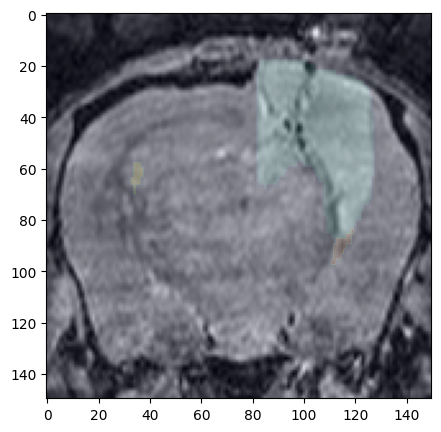

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


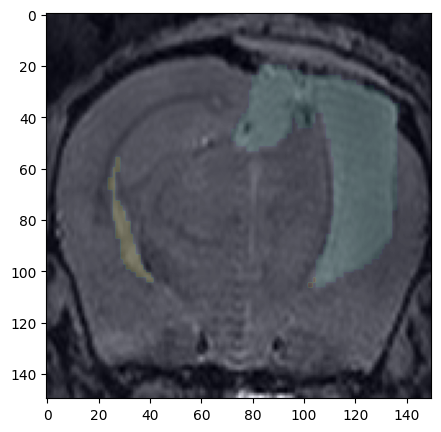

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


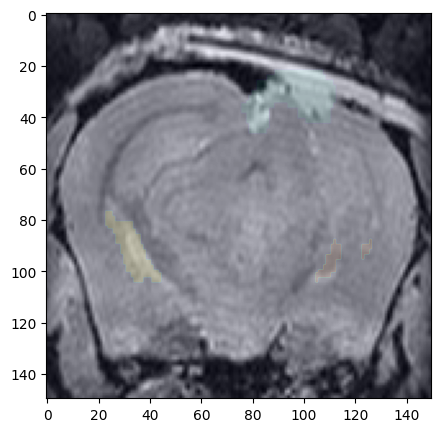

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


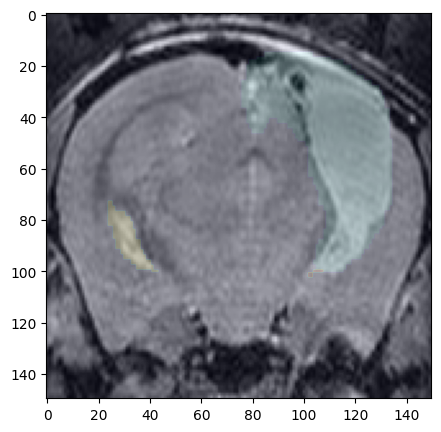

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


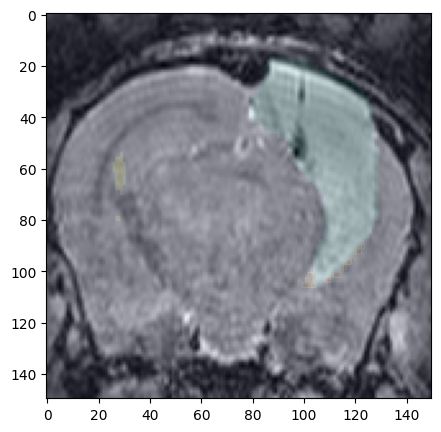

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


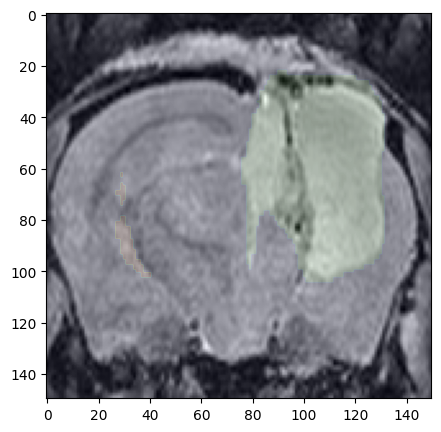

unique:  [0. 1. 2. 3.]
shape:  (150, 150, 37)


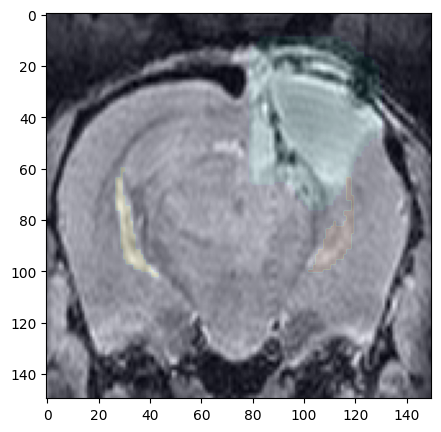

In [87]:
# Resample every image into (150,150,37)
import utils.vedo

from vedo import Volume, show
import cv2
import scipy.ndimage as itpl
import utils.visualization
importlib.reload(utils.visualization)
importlib.reload(utils.vedo)
from utils.vedo import plot_volume_cloud
from utils.visualization import plot_overlap

resize = [ 150, 150, 37 ]


path = '../data_fix/downsampled/'
for dir in os.listdir(path):
    case = dir
    # Plot data
    img, data, _ = load_data(dir, path, modalities)
    # Downsample
    #data['N4'] = skTrans.resize(data['N4'], (150,150,37), order=1, preserve_range=True)
    data['N4'] = itpl.zoom(data['N4'], (resize[0] / data['N4'].shape[0], resize[1] / data['N4'].shape[1], resize[2] / data['N4'].shape[2]), order=3, mode='nearest')
    #data['N4'] = skTrans.resize(data['N4'], (150,150,37), order=1, preserve_range=True)
    data['lesion_mask'] = itpl.zoom(data['lesion_mask'], (resize[0] / data['lesion_mask'].shape[0], resize[1] / data['lesion_mask'].shape[1], resize[2] / data['lesion_mask'].shape[2]), order=0, mode='nearest')

    print('unique: ', np.unique(data['lesion_mask']))
    print('shape: ', data['lesion_mask'].shape)
    
    #nib_to_gif(data['lesion_mask'], gif_path)
    plot_overlap(data['N4'], data['lesion_mask'], axis=2, rotation=-1, slice_id=20, alpha=0.08)

    # img
    img['N4'] = nib.Nifti1Image(data['N4'], img['N4'].affine, img['N4'].header, dtype=np.float64)
    img['lesion_mask'] = nib.Nifti1Image(data['lesion_mask'], img['lesion_mask'].affine, img['lesion_mask'].header, dtype=np.float64)
    #plot_volume_cloud(img['N4'], img['lesion_mask'], spacing=[1,1,10])

    # save nifti
    nib.save(img['N4'], os.path.join(path, case, 'Anat', case + '_N4.nii.gz'))
    nib.save(img['lesion_mask'], os.path.join(path, case, 'Anat', case + '_lesion_mask.nii.gz'))

    